# Section 1

In [1]:
import numpy as np
import pandas as pd
import json
import gzip
from urllib.request import urlopen
import time
import striprtf
from warnings import filterwarnings
filterwarnings("ignore")



from striprtf.striprtf import rtf_to_text

with open("/content/algoparams_from_ui1.json.rtf") as infile:
    content = infile.read()
    text = rtf_to_text(content)
print(text)

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {

      "session_info" : {
        "project_id": "1",
        "experiment_id": "kkkk-11",
        "dataset":"iris_modified.csv",
        "session_name": "test",
        "session_description": "test"
        },

      "target": {
        "prediction_type": "Classification",
        "target": "species",
        "type":"classifiation",
        "partitioning": true
      },
      "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": false,
        "train_ratio": 0.8,
        "random_seed": 10
      },
      "feature_handling": {
        "sepal_length": {
          "feature_name": "sepal_length",
          "is_selected": true,
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical f

In [2]:
#!pip install striprtf

In [3]:
data = json.loads(text)

In [4]:
data

{'session_name': 'test',
 'session_description': 'test',
 'design_state_data': {'session_info': {'project_id': '1',
   'experiment_id': 'kkkk-11',
   'dataset': 'iris_modified.csv',
   'session_name': 'test',
   'session_description': 'test'},
  'target': {'prediction_type': 'Classification',
   'target': 'species',
   'type': 'classifiation',
   'partitioning': True},
  'train': {'policy': 'Split the dataset',
   'time_variable': 'sepal_length',
   'sampling_method': 'No sampling(whole data)',
   'split': 'Randomly',
   'k_fold': False,
   'train_ratio': 0.8,
   'random_seed': 10},
  'feature_handling': {'sepal_length': {'feature_name': 'sepal_length',
    'is_selected': True,
    'feature_variable_type': 'numerical',
    'feature_details': {'numerical_handling': 'Keep as regular numerical feature',
     'rescaling': 'No rescaling',
     'make_derived_feats': False,
     'missing_values': 'Impute',
     'impute_with': 'Average of values'}},
   'sepal_width': {'feature_name': 'sepal_wi

In [5]:
df = pd.DataFrame.from_dict(data)
df

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Classification', 'target'..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


In [6]:
df.shape

(5, 3)

In [7]:
df_cp = df.copy(deep=True)

In [8]:
df = df.T

In [9]:
df

,algorithms,feature_handling,session_info,target,train
session_name,test,test,test,test,test
session_description,test,test,test,test,test
design_state_data,{'RandomForestClassifier': {'model_name': 'Ran...,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."


In [10]:
df.shape

(3, 5)

In [11]:
df = df.drop(['session_name', 'session_description'], axis= 0)
df

,algorithms,feature_handling,session_info,target,train
design_state_data,{'RandomForestClassifier': {'model_name': 'Ran...,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."


In [12]:
df= df.reset_index(drop =True)
df

,algorithms,feature_handling,session_info,target,train
0,{'RandomForestClassifier': {'model_name': 'Ran...,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."


In [13]:
df_cp1 = df.copy(deep =True)

In [14]:
for i in df.columns:
  print(i)
  df_new = df[i].explode()
  df_new = df_new.reset_index(drop =True)
  print(df_new)
  print('----------------')

algorithms
0     RandomForestClassifier
1      RandomForestRegressor
2           LinearRegression
3         LogisticRegression
4            RidgeRegression
5            LassoRegression
6       ElasticNetRegression
7                   xg_boost
8      DecisionTreeRegressor
9     DecisionTreeClassifier
10                       SVM
11                       KNN
12            neural_network
Name: algorithms, dtype: object
----------------
feature_handling
0    sepal_length
1     sepal_width
2    petal_length
3     petal_width
4         species
Name: feature_handling, dtype: object
----------------
session_info
0             project_id
1          experiment_id
2                dataset
3           session_name
4    session_description
Name: session_info, dtype: object
----------------
target
0    prediction_type
1             target
2               type
3       partitioning
Name: target, dtype: object
----------------
train
0             policy
1      time_variable
2    sampling_method
3      

In [15]:
df.columns

Index(['algorithms', 'feature_handling', 'session_info', 'target', 'train'], dtype='object')

In [16]:
df1 = df['algorithms']
df11 = df1[0]
df11

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'LinearRegression': {'model_name': 'LinearRegression',
  'is_selected': False,
  'parallelism': 2,
  'min_iter': 30,
  'max_iter': 50,
  'min_regparam': 0.5,
  'max_regparam': 0.8,
  'min_elasticnet': 0.5,
  'max_elasticnet': 0.8},
 'LogisticRegression': {'model_name': 'LogisticRegression',
  'is_selected': False,
  'parallelism': 2,
  'min_iter': 30,
  'max_iter': 50,
  'min

In [17]:
df1 = df['algorithms']
df11 = df1[0]
df11 = pd.DataFrame.from_dict(df11)
df12 = df11.explode('RandomForestClassifier')
df12

,RandomForestClassifier,RandomForestRegressor,LinearRegression,LogisticRegression,RidgeRegression,LassoRegression,ElasticNetRegression,xg_boost,DecisionTreeRegressor,DecisionTreeClassifier,SVM,KNN,neural_network
model_name,Random Forest Classifier,Random Forest Regressor,LinearRegression,LogisticRegression,RidgeRegression,Lasso Regression,Lasso Regression,XG Boost,Decision Tree,Decision Tree,Support Vector Machine,KNN,Neural Network
is_selected,True,False,False,False,False,False,False,False,False,True,False,False,False
min_trees,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_trees,30,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_sampling_statergy,Default,Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
beta_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
epsilon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
power_t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
momentum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
df12['RandomForestClassifier'].values

array(['Random Forest Classifier', True, 10, 30, 'Default', 20, 30, 5, 50,
       0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan], dtype=object)

In [19]:
df12['LogisticRegression'].values

array(['LogisticRegression', False, nan, nan, nan, nan, nan, nan, nan, 2,
       30, 50, 0.5, 0.8, 0.5, 0.8, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=object)

In [20]:
df12['DecisionTreeRegressor'].values

array(['Decision Tree', False, nan, nan, nan, 4, 7, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, False, True,
       list([12, 6]), True, True, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [21]:
df12['DecisionTreeClassifier'].values

array(['Decision Tree', True, nan, nan, nan, 4, 7, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, False, True,
       list([12, 6]), True, False, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [22]:
df12['xg_boost'].values

array(['XG Boost', False, nan, nan, nan, nan, nan, nan, nan, 0, nan, nan,
       nan, nan, nan, nan, nan, True, True, '', 0, 0, True, 2,
       list([56, 89]), list([89, 76]), list([77]), list([78]), list([68]),
       list([67]), list([67]), list([67]), False, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=object)

In [23]:
df12['SVM'].values

array(['Support Vector Machine', False, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, True, True, True, True, list([566, 79]), True, True,
       True, 7, 7, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [24]:
df2 = df['feature_handling']
df21 = df2[0]
df21 = pd.DataFrame.from_dict(df21)
df22 = df21.explode('sepal_length')
df22

,sepal_length,sepal_width,petal_length,petal_width,species
feature_name,sepal_length,sepal_width,petal_length,petal_width,species
is_selected,True,True,True,False,True
feature_variable_type,numerical,numerical,numerical,numerical,text
feature_details,numerical_handling,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,"{'text_handling': 'Tokenize and hash', 'hash_c..."
feature_details,rescaling,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,"{'text_handling': 'Tokenize and hash', 'hash_c..."
feature_details,make_derived_feats,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,"{'text_handling': 'Tokenize and hash', 'hash_c..."
feature_details,missing_values,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,"{'text_handling': 'Tokenize and hash', 'hash_c..."
feature_details,impute_with,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,"{'text_handling': 'Tokenize and hash', 'hash_c..."


In [25]:
df22.shape

(8, 5)

In [26]:
df22['sepal_length'].values

array(['sepal_length', True, 'numerical', 'numerical_handling',
       'rescaling', 'make_derived_feats', 'missing_values', 'impute_with'],
      dtype=object)

In [27]:
df22['sepal_width'].values

array(['sepal_width', True, 'numerical',
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'}],
      dt

In [28]:
df22['petal_width'].values

array(['petal_width', False, 'numerical',
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'},
       {'numerical_handling': 'Keep as regular numerical feature', 'rescaling': 'No rescaling', 'make_derived_feats': False, 'missing_values': 'Impute', 'impute_with': 'Average of values'}],
      d

In [29]:
df22['species'].values

array(['species', True, 'text',
       {'text_handling': 'Tokenize and hash', 'hash_columns': 0},
       {'text_handling': 'Tokenize and hash', 'hash_columns': 0},
       {'text_handling': 'Tokenize and hash', 'hash_columns': 0},
       {'text_handling': 'Tokenize and hash', 'hash_columns': 0},
       {'text_handling': 'Tokenize and hash', 'hash_columns': 0}],
      dtype=object)

In [30]:
df3 = df['session_info']
df31 = df3[0]
df32 = pd.DataFrame([df31], index=[0])
df32

,project_id,experiment_id,dataset,session_name,session_description
0,1,kkkk-11,iris_modified.csv,test,test


In [31]:
df4 = df['target']
df41 = df4[0]
df42 = pd.DataFrame([df41], index=[0])
df42

,prediction_type,target,type,partitioning
0,Classification,species,classifiation,True


In [32]:
df5 = df['train']
df51 = df5[0]
df52 = pd.DataFrame([df51], index=[0])
df52

,policy,time_variable,sampling_method,split,k_fold,train_ratio,random_seed
0,Split the dataset,sepal_length,No sampling(whole data),Randomly,False,0.8,10


In [33]:
new_df=pd.concat([df12, df22, df32, df42, df52],axis=0,ignore_index=True)
new_df
# This new_df contains all the data in dataframe format.

,RandomForestClassifier,RandomForestRegressor,LinearRegression,LogisticRegression,RidgeRegression,LassoRegression,ElasticNetRegression,xg_boost,DecisionTreeRegressor,DecisionTreeClassifier,...,target,type,partitioning,policy,time_variable,sampling_method,split,k_fold,train_ratio,random_seed
0,Random Forest Classifier,Random Forest Regressor,LinearRegression,LogisticRegression,RidgeRegression,Lasso Regression,Lasso Regression,XG Boost,Decision Tree,Decision Tree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,False,False,False,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Default,Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,species,classifiation,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
final_result_df1 = df.explode(['algorithms']).reset_index(drop=True)
final_result_df1   #Only algorithms column are exploded to get an view of data.

,algorithms,feature_handling,session_info,target,train
0,RandomForestClassifier,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
1,RandomForestRegressor,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
2,LinearRegression,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
3,LogisticRegression,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
4,RidgeRegression,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
5,LassoRegression,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
6,ElasticNetRegression,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
7,xg_boost,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
8,DecisionTreeRegressor,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."
9,DecisionTreeClassifier,{'sepal_length': {'feature_name': 'sepal_lengt...,"{'project_id': '1', 'experiment_id': 'kkkk-11'...","{'prediction_type': 'Classification', 'target'...","{'policy': 'Split the dataset', 'time_variable..."


In [35]:
df_algorithms = df['algorithms'].explode()
df_algorithms = df_algorithms.reset_index(drop =True)
df_feature_handling = df['feature_handling'].explode()
df_feature_handling = df_feature_handling.reset_index(drop =True)
df_session_info = df['session_info'].explode()
df_session_info = df_session_info.reset_index(drop =True)
df_target = df['target'].explode()
df_target = df_target.reset_index(drop =True)
df_train = df['train'].explode()
df_train = df_train.reset_index(drop =True)
final_result_df2 = pd.concat([df_algorithms, df_feature_handling, df_session_info, df_target, df_train], axis=1)
final_result_df2
#Here all columns are exploded to get an proper view of data.

,algorithms,feature_handling,session_info,target,train
0,RandomForestClassifier,sepal_length,project_id,prediction_type,policy
1,RandomForestRegressor,sepal_width,experiment_id,target,time_variable
2,LinearRegression,petal_length,dataset,type,sampling_method
3,LogisticRegression,petal_width,session_name,partitioning,split
4,RidgeRegression,species,session_description,NaN,k_fold
5,LassoRegression,NaN,NaN,NaN,train_ratio
6,ElasticNetRegression,NaN,NaN,NaN,random_seed
7,xg_boost,NaN,NaN,NaN,NaN
8,DecisionTreeRegressor,NaN,NaN,NaN,NaN
9,DecisionTreeClassifier,NaN,NaN,NaN,NaN


# Section 2

In [36]:
df = pd.read_csv('/content/iris_modified.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## The data is divided into five parts as seen below.

In [37]:
df12 = df12.T
df12 = df12.reset_index(drop =True)
df12.head()

,model_name,is_selected,min_trees,max_trees,feature_sampling_statergy,min_depth,max_depth,min_samples_per_leaf_min_value,min_samples_per_leaf_max_value,parallelism,...,solver,shuffle_data,initial_learning_rate,automatic_batching,beta_1,beta_2,epsilon,power_t,momentum,use_nesterov_momentum
0,Random Forest Classifier,True,10,30,Default,20,30,5,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Random Forest Regressor,False,10,20,Default,20,25,5,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LinearRegression,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LogisticRegression,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RidgeRegression,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df22 = df22.T
df22 = df22.reset_index(drop =True)
df22.head()

,feature_name,is_selected,feature_variable_type,feature_details,feature_details,feature_details,feature_details,feature_details
0,sepal_length,True,numerical,numerical_handling,rescaling,make_derived_feats,missing_values,impute_with
1,sepal_width,True,numerical,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...
2,petal_length,True,numerical,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...
3,petal_width,False,numerical,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...,{'numerical_handling': 'Keep as regular numeri...
4,species,True,text,"{'text_handling': 'Tokenize and hash', 'hash_c...","{'text_handling': 'Tokenize and hash', 'hash_c...","{'text_handling': 'Tokenize and hash', 'hash_c...","{'text_handling': 'Tokenize and hash', 'hash_c...","{'text_handling': 'Tokenize and hash', 'hash_c..."


In [39]:
df32.head()

,project_id,experiment_id,dataset,session_name,session_description
0,1,kkkk-11,iris_modified.csv,test,test


In [40]:
df42.head()

,prediction_type,target,type,partitioning
0,Classification,species,classifiation,True


In [41]:
df52.head()

,policy,time_variable,sampling_method,split,k_fold,train_ratio,random_seed
0,Split the dataset,sepal_length,No sampling(whole data),Randomly,False,0.8,10


In [42]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [43]:
X = df.drop("species", axis=1)
y = df["species"]
X.head()                                      #From the data observed in 'df42' we can take 'species' as target variable.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=10,stratify=y) #train_ratio is 0.8 and random_seed is 10.

In [46]:
y_test.value_counts()

species
Iris-versicolor    10
Iris-setosa        10
Iris-virginica     10
Name: count, dtype: int64

**RandomForestClassifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
Rf_model= RandomForestClassifier(random_state=10,oob_score=True) #random seed is 10

In [49]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=10)

In [50]:
Rf_model.score(X_train,y_train)

1.0

In [51]:
Rf_model.score(X_test,y_test)

1.0

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
ytrain_predict=Rf_model.predict(X_train)
ytest_predict=Rf_model.predict(X_test)

In [54]:
import seaborn as sns

<Axes: >

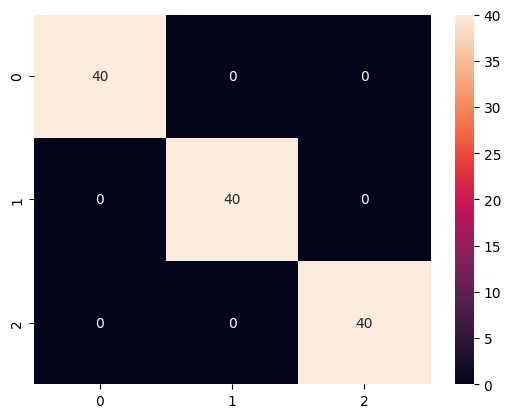

In [55]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g')

In [56]:
print(classification_report(y_train,ytrain_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



<Axes: >

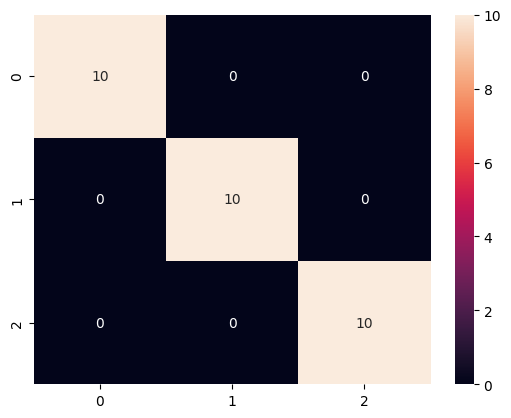

In [57]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g')

In [58]:
print(classification_report(y_test,ytest_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**1. As target variable 'species' was a classification type,
I have used 'Random Forest Classifier' to build the model.**

**2. And evaluated the model using confusion matrix and classification report.**

**3. Since I got 100% accuracy both in train and test data, there is no need in checking for other algorithms.**

 **4. Hence 'Random Forest Classifier' can be considered as the best model to work with the given 'iris_modified' dataset.**

In [59]:
# Just checking other models as a prototype only.

In [60]:
df1 = df.copy(deep = True)

In [61]:
df1['species'] = pd.Categorical(df1['species']).codes

In [62]:
X = df1.drop("species", axis=1)
y = df1["species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int8

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=10,stratify=y) #train_ratio is 0.8 and random_seed is 10.

In [65]:
y_test.value_counts()

species
1    10
0    10
2    10
Name: count, dtype: int64

**LogisticRegression**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
clf = LogisticRegression(random_state=10, max_iter=50)# max_iter is 50 and random seed is 10 as seen in the data extracted.
clf.fit(X_train, y_train)

LogisticRegression(max_iter=50, random_state=10)

In [68]:
y_pred = clf.predict(X_test)

In [69]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9666666666666667


In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [71]:
mse_logistic = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Logistic reg):", mse_logistic)

Mean Squared Error (Logistic reg): 0.03333333333333333


**SVM**

In [72]:
from sklearn import svm
from sklearn import metrics

In [73]:
svm_model=svm.SVC(random_state=1,C=566, kernel='rbf', degree=3, gamma='scale', tol=7, max_iter=7) #C=566, tol=7 and max_iter=7.
svm_model.fit(X_train, y_train)

SVC(C=566, max_iter=7, random_state=1, tol=7)

In [74]:
## Performance Matrix on train data set
y_train_predict = svm_model.predict(X_train)
model_score =svm_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.3333333333333333
[[ 0  0 40]
 [ 0  0 40]
 [ 0  0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.33      1.00      0.50        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



In [75]:
## Performance Matrix on test data set
y_test_predict = svm_model.predict(X_test)
model_score = svm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.3333333333333333
[[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.33      1.00      0.50        10

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



In [76]:
#For C=79, tol=7 and max_iter=7.
svm_model=svm.SVC(random_state=1,C=79, kernel='rbf', degree=3, gamma='scale', tol=7, max_iter=7)
svm_model.fit(X_train, y_train)

SVC(C=79, max_iter=7, random_state=1, tol=7)

In [77]:
## Performance Matrix on train data set
y_train_predict = svm_model.predict(X_train)
model_score =svm_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.3333333333333333
[[ 0  0 40]
 [ 0  0 40]
 [ 0  0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.33      1.00      0.50        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



In [78]:
## Performance Matrix on test data set
y_test_predict = svm_model.predict(X_test)
model_score = svm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.3333333333333333
[[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.33      1.00      0.50        10

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



**xg_boost**

In [79]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=10,
  max_depth_of_tree = 56,
  learningRate= 89,
  l1_regularization = 77,
  l2_regularization = 78,
  gamma= 68,
  min_child_weight = 67,
  sub_sample = 67,
  col_sample_by_tree = 67,
  parallelism = 0)
XGB_model.fit(X_train, y_train)               #All hyper parameters are set according to the data extracted.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              col_sample_by_tree=67, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=68, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              l1_regularization=77, l2_regularization=78, learningRate=89,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_depth_of_tree=56, max_leaves=None, min_child_weight=67,
              missing=nan, monotone_constraints=None, ...)

In [80]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.3333333333333333
[[40  0  0]
 [40  0  0]
 [40  0  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        40
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



In [81]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score),
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.3333333333333333
[[10  0  0]
 [10  0  0]
 [10  0  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30

